<a href="https://colab.research.google.com/github/Ashrithajangam/IT7133-FALL24/blob/main/Enterprice_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
import joblib
from IPython.display import display, clear_output
import ipywidgets as widgets
from google.colab import drive

# **Load the dataset**

In [14]:
drive.mount('/content/drive')

print("Please upload your dataset.")
uploaded = files.upload()

datafile = list(uploaded.keys())[0]
df = pd.read_csv(datafile)

display(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Please upload your dataset.


Saving HR-Employee-Attrition.csv to HR-Employee-Attrition (2).csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Data Preprocessing**

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-0.660531,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,0.254625,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,1.169781,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,1.169781,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.575686,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


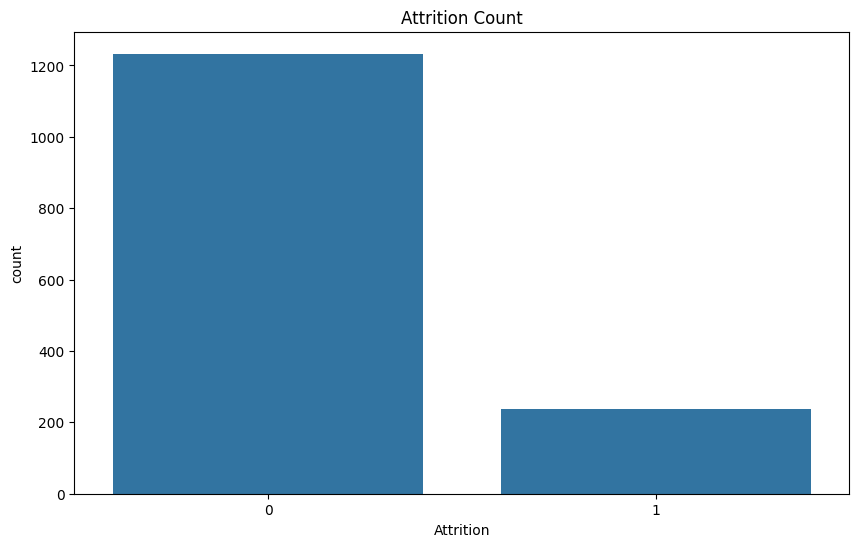

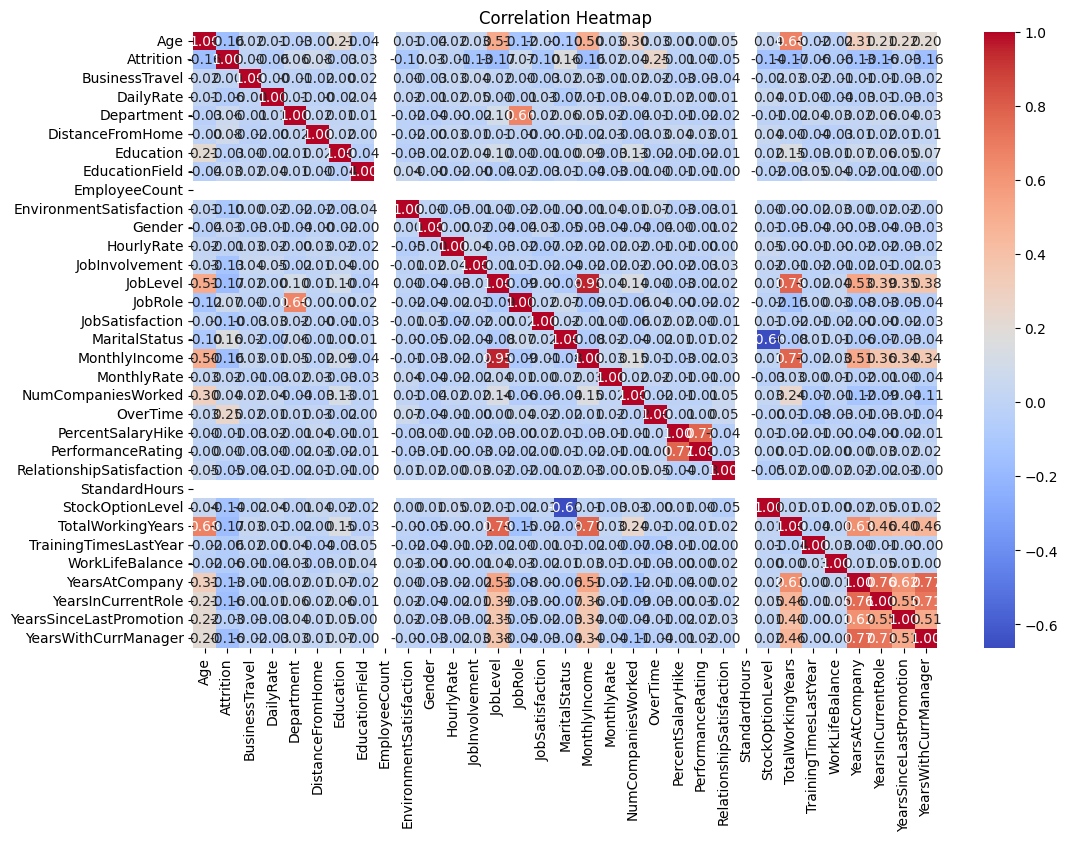

In [15]:
print("Dataset Information:")
df.info()

print("Missing Values:")
display(df.isnull().sum())

#Drop irrelevant columns
irrelevant_columns = ["EmployeeNumber", "Over18"]
df.drop(columns=irrelevant_columns, inplace=True, errors='ignore')

#Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Attrition']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

display(df.head())

#Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Model Training and Saving**

In [16]:
# Step 5: Splitting Dataset
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Model Training and Saving
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use n_jobs=-1 for parallel processing
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

model_file = '/content/drive/MyDrive/Model/project_model/employee_attrition_model.pkl'
joblib.dump(rf_model, model_file)
print(f"Model saved at: {model_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved at: /content/drive/MyDrive/Model/project_model/employee_attrition_model.pkl


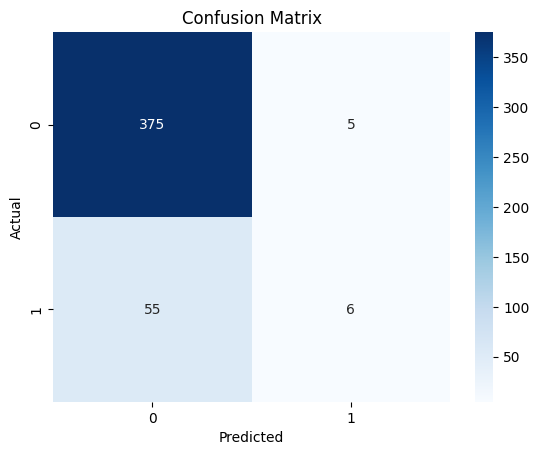

In [19]:
def load_model():
    return joblib.load(model_file)

def predict_attrition(input_data):
    model = load_model()
    prediction = model.predict(input_data)
    return prediction

try:
    y_pred = rf_model.predict(X_test)
except AttributeError as e:
    print("Model is not properly trained or initialized. Please check the training step.")
    raise e

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Classification, Accuracy Score, Feature Importance**

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.55      0.10      0.17        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.55       441
weighted avg       0.83      0.86      0.82       441

Accuracy: 86.39%


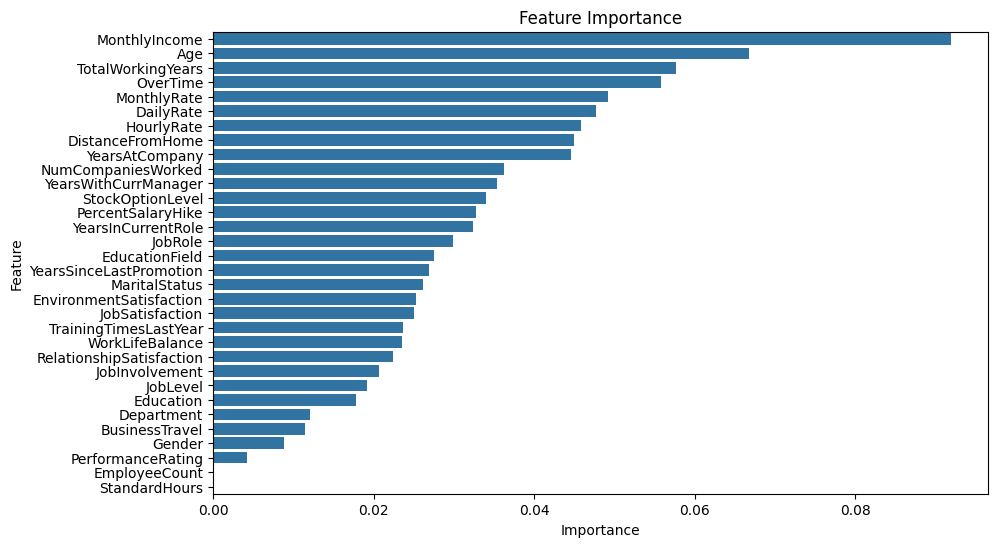

In [21]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

# **GUI for Model Prediction**

In [29]:
def create_gui():
    clear_output()
    print("Enter Employee Details for Prediction:")

    # Extract unique options for dropdowns from the dataset
    categorical_choices = {
        'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
        'Department': ['Research & Development', 'Sales', 'Human Resources'],
        'EducationField': ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources'],
        'Gender': ['Male', 'Female'],
        'JobRole': ['Sales Executive', 'Research Scientist', 'Laboratory Technician',
                    'Manufacturing Director', 'Healthcare Representative',
                    'Manager', 'Technical Support', 'Sales Representative', 'Human Resources'],
        'MaritalStatus': ['Single', 'Married', 'Divorced'],
        'OverTime': ['Yes', 'No']
    }

    # Get unique values for numerical fields from the dataset
    numerical_fields = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                        'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

    inputs = {}

    # Create dropdowns or textboxes for all features
    for column in X.columns:
        if column in categorical_choices:  # Dropdown for categorical fields
            inputs[column] = widgets.Dropdown(
                options=categorical_choices[column],
                description=column,
                layout=widgets.Layout(width='50%')
            )
        elif column in numerical_fields:  # Textbox for numerical fields
            inputs[column] = widgets.Text(
                value='',
                placeholder=f"Enter {column}",
                description=column,
                layout=widgets.Layout(width='50%')
            )
        else:  # Default textbox for any other field
            inputs[column] = widgets.Text(
                value='',
                placeholder=f"Enter {column}",
                description=column,
                layout=widgets.Layout(width='50%')
            )
        display(inputs[column])

    button = widgets.Button(description="Predict", button_style='success')
    output = widgets.Output()

    def on_button_click(b):
        with output:
            clear_output()
            try:
                # Create a full feature set from user inputs
                full_feature_input = {}
                for col in X.columns:
                    if col in label_encoders:  # Handle categorical fields
                        value = inputs[col].value if isinstance(inputs[col], widgets.Text) else inputs[col].label
                        full_feature_input[col] = label_encoders[col].transform([value])[0]
                    else:  # Handle numerical fields
                        full_feature_input[col] = float(inputs[col].value)

                # Convert to DataFrame
                input_data = pd.DataFrame([full_feature_input])
                prediction = predict_attrition(input_data)
                print(f"Prediction: {'Attrition' if prediction[0] == 1 else 'No Attrition'}")
            except ValueError as e:
                print(f"Error: {e}")
                print("Please enter valid values for all fields.")
            except Exception as ex:
                print(f"Unexpected Error: {ex}")

    button.on_click(on_button_click)
    display(button, output)

create_gui()

Enter Employee Details for Prediction:


Text(value='', description='Age', layout=Layout(width='50%'), placeholder='Enter Age')

Dropdown(description='BusinessTravel', layout=Layout(width='50%'), options=('Travel_Rarely', 'Travel_Frequentl…

Text(value='', description='DailyRate', layout=Layout(width='50%'), placeholder='Enter DailyRate')

Dropdown(description='Department', layout=Layout(width='50%'), options=('Research & Development', 'Sales', 'Hu…

Text(value='', description='DistanceFromHome', layout=Layout(width='50%'), placeholder='Enter DistanceFromHome…

Text(value='', description='Education', layout=Layout(width='50%'), placeholder='Enter Education')

Dropdown(description='EducationField', layout=Layout(width='50%'), options=('Life Sciences', 'Medical', 'Marke…

Text(value='', description='EmployeeCount', layout=Layout(width='50%'), placeholder='Enter EmployeeCount')

Text(value='', description='EnvironmentSatisfaction', layout=Layout(width='50%'), placeholder='Enter Environme…

Dropdown(description='Gender', layout=Layout(width='50%'), options=('Male', 'Female'), value='Male')

Text(value='', description='HourlyRate', layout=Layout(width='50%'), placeholder='Enter HourlyRate')

Text(value='', description='JobInvolvement', layout=Layout(width='50%'), placeholder='Enter JobInvolvement')

Text(value='', description='JobLevel', layout=Layout(width='50%'), placeholder='Enter JobLevel')

Dropdown(description='JobRole', layout=Layout(width='50%'), options=('Sales Executive', 'Research Scientist', …

Text(value='', description='JobSatisfaction', layout=Layout(width='50%'), placeholder='Enter JobSatisfaction')

Dropdown(description='MaritalStatus', layout=Layout(width='50%'), options=('Single', 'Married', 'Divorced'), v…

Text(value='', description='MonthlyIncome', layout=Layout(width='50%'), placeholder='Enter MonthlyIncome')

Text(value='', description='MonthlyRate', layout=Layout(width='50%'), placeholder='Enter MonthlyRate')

Text(value='', description='NumCompaniesWorked', layout=Layout(width='50%'), placeholder='Enter NumCompaniesWo…

Dropdown(description='OverTime', layout=Layout(width='50%'), options=('Yes', 'No'), value='Yes')

Text(value='', description='PercentSalaryHike', layout=Layout(width='50%'), placeholder='Enter PercentSalaryHi…

Text(value='', description='PerformanceRating', layout=Layout(width='50%'), placeholder='Enter PerformanceRati…

Text(value='', description='RelationshipSatisfaction', layout=Layout(width='50%'), placeholder='Enter Relation…

Text(value='', description='StandardHours', layout=Layout(width='50%'), placeholder='Enter StandardHours')

Text(value='', description='StockOptionLevel', layout=Layout(width='50%'), placeholder='Enter StockOptionLevel…

Text(value='', description='TotalWorkingYears', layout=Layout(width='50%'), placeholder='Enter TotalWorkingYea…

Text(value='', description='TrainingTimesLastYear', layout=Layout(width='50%'), placeholder='Enter TrainingTim…

Text(value='', description='WorkLifeBalance', layout=Layout(width='50%'), placeholder='Enter WorkLifeBalance')

Text(value='', description='YearsAtCompany', layout=Layout(width='50%'), placeholder='Enter YearsAtCompany')

Text(value='', description='YearsInCurrentRole', layout=Layout(width='50%'), placeholder='Enter YearsInCurrent…

Text(value='', description='YearsSinceLastPromotion', layout=Layout(width='50%'), placeholder='Enter YearsSinc…

Text(value='', description='YearsWithCurrManager', layout=Layout(width='50%'), placeholder='Enter YearsWithCur…

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()